# Problem Definition
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Dependent Variable (Target Variable):

- Loan_Status

we have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. The problem is a classification problem.

# Data Analysis

In [76]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [9]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
d1=le.fit_transform(df['Gender'])
d2=le.fit_transform(df['Married'])
d3=le.fit_transform(df['Education'])
d4=le.fit_transform(df['Self_Employed'])
d5=le.fit_transform(df['Loan_Status'])
d6=le.fit_transform(df['Property_Area'])

In [26]:
df['Gender']=d1
df['Married']=d2
df['Education']=d3
df['Self_Employed']=d4
df['Loan_Status']=d5
df['Property_Area']=d6

In [27]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [33]:
df['Dependents']=df['Dependents'].replace({'3+':3})

In [39]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer

In [36]:
ki= KNNImputer(n_neighbors=3)

In [47]:
df2=ki.fit_transform(df[['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']])

In [53]:
data2 = pd.DataFrame(df2, columns =['Dependent','Loan_amount','Loan_amount_Term','Credit_history'])

In [54]:
data2

,Dependent,Loan_amount,Loan_amount_Term,Credit_history
0,0.0,109.0,360.0,1.0
1,1.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,0.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0
...,...,...,...,...
609,0.0,71.0,360.0,1.0
610,3.0,40.0,180.0,1.0
611,1.0,253.0,360.0,1.0
612,2.0,187.0,360.0,1.0


In [55]:
df_1L=pd.concat([df, data2], axis=1, join='inner')
df_1L

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent,Loan_amount,Loan_amount_Term,Credit_history
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,0.0,109.0,360.0,1.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1.0,128.0,360.0,1.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0.0,66.0,360.0,1.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0.0,120.0,360.0,1.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,0.0,71.0,360.0,1.0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,3.0,40.0,180.0,1.0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,1.0,253.0,360.0,1.0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,2.0,187.0,360.0,1.0


In [58]:
a=df_1L.drop(columns='Dependents')
b=a.drop(columns='LoanAmount')
c=b.drop(columns='Loan_Amount_Term')
d=c.drop(columns='Credit_History')
df_1=d.drop(columns='Loan_ID')

In [59]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Education          614 non-null    int32  
 3   Self_Employed      614 non-null    int32  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   Property_Area      614 non-null    int32  
 7   Loan_Status        614 non-null    int32  
 8   Dependent          614 non-null    float64
 9   Loan_amount        614 non-null    float64
 10  Loan_amount_Term   614 non-null    float64
 11  Credit_history     614 non-null    float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 43.3 KB


In [61]:
df_1.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Loan_Status          0
Dependent            0
Loan_amount          0
Loan_amount_Term     0
Credit_history       0
dtype: int64

In [64]:
df_1.head(20)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Dependent,Loan_amount,Loan_amount_Term,Credit_history
0,1,0,0,0,5849,0.0,2,1,0.0,109.0,360.0,1.000000
1,1,1,0,0,4583,1508.0,0,0,1.0,128.0,360.0,1.000000
2,1,1,0,1,3000,0.0,2,1,0.0,66.0,360.0,1.000000
3,1,1,1,0,2583,2358.0,2,1,0.0,120.0,360.0,1.000000
4,1,0,0,0,6000,0.0,2,1,0.0,141.0,360.0,1.000000
5,1,1,0,1,5417,4196.0,2,1,2.0,267.0,360.0,1.000000
6,1,1,1,0,2333,1516.0,2,1,0.0,95.0,360.0,1.000000
7,1,1,0,0,3036,2504.0,1,0,3.0,158.0,360.0,0.000000
8,1,1,0,0,4006,1526.0,2,1,2.0,168.0,360.0,1.000000
9,1,1,0,0,12841,10968.0,1,0,1.0,349.0,360.0,1.000000


In [65]:
df_1.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Dependent,Loan_amount,Loan_amount_Term,Credit_history
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.218241,0.237785,5403.459283,1621.245798,1.037459,0.687296,0.756786,146.195440,342.280130,0.843105
std,0.421752,0.484971,0.413389,0.534737,6109.041673,2926.248369,0.787482,0.463973,1.005254,84.724733,64.504231,0.353899
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,0.000000,0.000000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,1.000000,1.000000,0.000000,127.000000,360.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,2.000000,1.000000,1.250000,168.000000,360.000000,1.000000
max,2.000000,2.000000,1.000000,2.000000,81000.000000,41667.000000,2.000000,1.000000,3.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

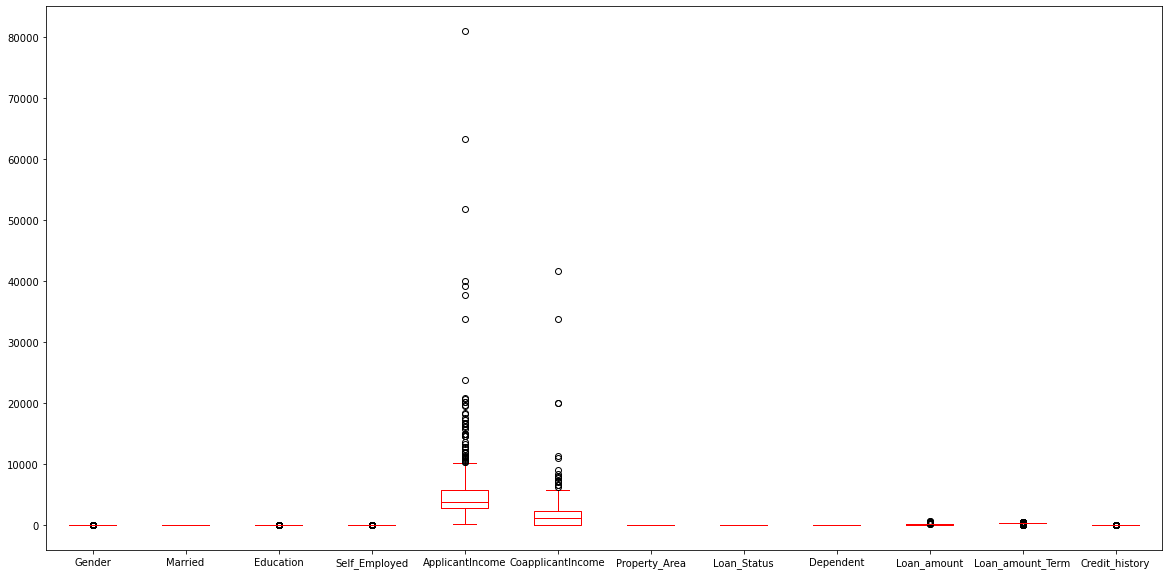

In [66]:
df_1.plot(kind='box', figsize=(20,10), color='r')

In [68]:
df_1.skew()

Gender              -0.953015
Married             -0.538097
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
Property_Area       -0.066196
Loan_Status         -0.809998
Dependent            1.000332
Loan_amount          2.679681
Loan_amount_Term    -2.387462
Credit_history      -1.910914
dtype: float64

In [82]:
q3=df_1.quantile(0.75)

In [83]:
q1=df_1.quantile(0.25)

In [84]:
iqr=q3-q1

In [85]:
applicant_Income=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
Coapp_Income=(q3.CoapplicantIncome+(1.5*iqr.ApplicantIncome))

In [86]:
index1=np.where(df_1['ApplicantIncome']>applicant_Income)

In [87]:
df_1=df_1.drop(df_1.index[index1])

In [88]:
df_1.reset_index()

,index,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Dependent,Loan_amount,Loan_amount_Term,Credit_history
0,0,1,0,0,0,5849,0.0,2,1,0.0,109.0,360.0,1.0
1,1,1,1,0,0,4583,1508.0,0,0,1.0,128.0,360.0,1.0
2,2,1,1,0,1,3000,0.0,2,1,0.0,66.0,360.0,1.0
3,3,1,1,1,0,2583,2358.0,2,1,0.0,120.0,360.0,1.0
4,4,1,0,0,0,6000,0.0,2,1,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,609,0,0,0,0,2900,0.0,0,1,0.0,71.0,360.0,1.0
535,610,1,1,0,0,4106,0.0,0,1,3.0,40.0,180.0,1.0
536,611,1,1,0,0,8072,240.0,2,1,1.0,253.0,360.0,1.0
537,612,1,1,0,0,7583,0.0,2,1,2.0,187.0,360.0,1.0


In [89]:
index2=np.where(df_1['CoapplicantIncome']>Coapp_Income)

In [90]:
df_1=df_1.drop(df_1.index[index2])

In [91]:
df_1.reset_index()

,index,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Dependent,Loan_amount,Loan_amount_Term,Credit_history
0,0,1,0,0,0,5849,0.0,2,1,0.0,109.0,360.0,1.0
1,1,1,1,0,0,4583,1508.0,0,0,1.0,128.0,360.0,1.0
2,2,1,1,0,1,3000,0.0,2,1,0.0,66.0,360.0,1.0
3,3,1,1,1,0,2583,2358.0,2,1,0.0,120.0,360.0,1.0
4,4,1,0,0,0,6000,0.0,2,1,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,609,0,0,0,0,2900,0.0,0,1,0.0,71.0,360.0,1.0
520,610,1,1,0,0,4106,0.0,0,1,3.0,40.0,180.0,1.0
521,611,1,1,0,0,8072,240.0,2,1,1.0,253.0,360.0,1.0
522,612,1,1,0,0,7583,0.0,2,1,2.0,187.0,360.0,1.0


In [92]:
df_1.skew()

Gender              -1.094638
Married             -0.550159
Education            1.158018
Self_Employed        2.397783
ApplicantIncome      0.726595
CoapplicantIncome    0.791985
Property_Area       -0.046921
Loan_Status         -0.837975
Dependent            1.037064
Loan_amount          0.949539
Loan_amount_Term    -2.482129
Credit_history      -1.883104
dtype: float64

<AxesSubplot:>

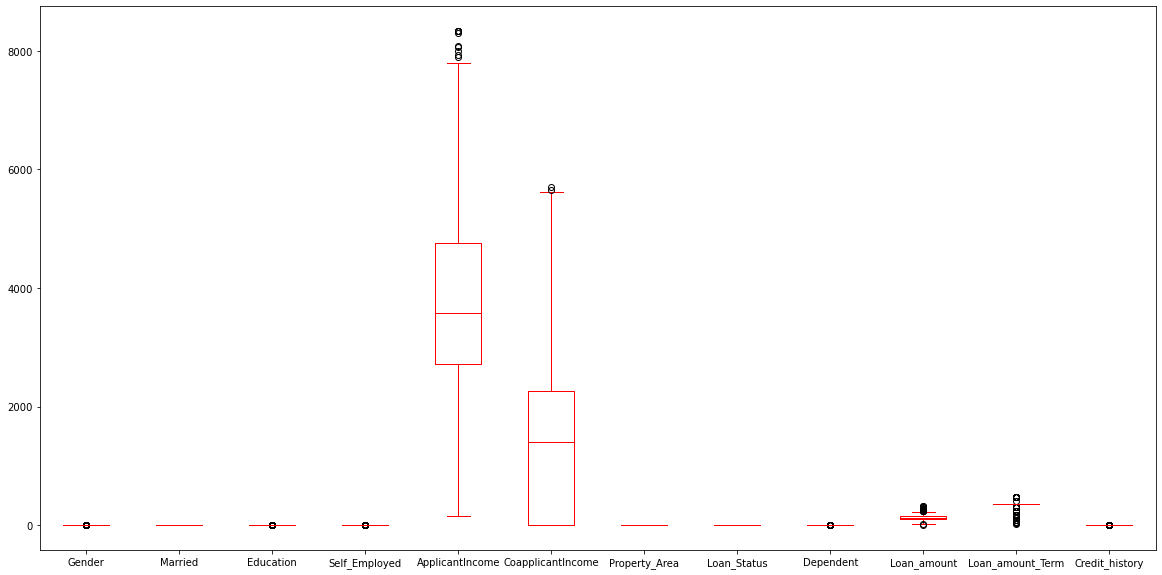

In [93]:
df_1.plot(kind='box', figsize=(20,10), color='r')

In [94]:
df_1.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Dependent,Loan_amount,Loan_amount_Term,Credit_history
Gender,1.000000,0.355095,0.055867,-0.014235,0.066921,0.220039,-0.021303,0.006538,0.163792,0.135483,-0.066888,-0.019998
Married,0.355095,1.000000,0.020511,-0.026976,0.005201,0.251672,0.024365,0.080318,0.341650,0.207654,-0.067225,0.001108
Education,0.055867,0.020511,1.000000,-0.012473,-0.115928,-0.054542,-0.070318,-0.112246,0.093602,-0.121613,-0.085931,-0.096018
Self_Employed,-0.014235,-0.026976,-0.012473,1.000000,0.074596,-0.021183,-0.036978,0.008013,0.021155,0.036065,-0.023266,0.066154
ApplicantIncome,0.066921,0.005201,-0.115928,0.074596,1.000000,-0.207724,-0.071148,-0.001690,0.119170,0.454874,-0.040140,0.029807
CoapplicantIncome,0.220039,0.251672,-0.054542,-0.021183,-0.207724,1.000000,-0.070857,0.078478,-0.072019,0.363362,-0.006978,0.017219
Property_Area,-0.021303,0.024365,-0.070318,-0.036978,-0.071148,-0.070857,1.000000,0.033271,0.029552,-0.098365,-0.075863,0.015307
Loan_Status,0.006538,0.080318,-0.112246,0.008013,-0.001690,0.078478,0.033271,1.000000,0.000596,0.005863,-0.011181,0.565446
Dependent,0.163792,0.341650,0.093602,0.021155,0.119170,-0.072019,0.029552,0.000596,1.000000,0.095397,-0.114325,-0.069156
Loan_amount,0.135483,0.207654,-0.121613,0.036065,0.454874,0.363362,-0.098365,0.005863,0.095397,1.000000,0.105201,0.019301


In [98]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

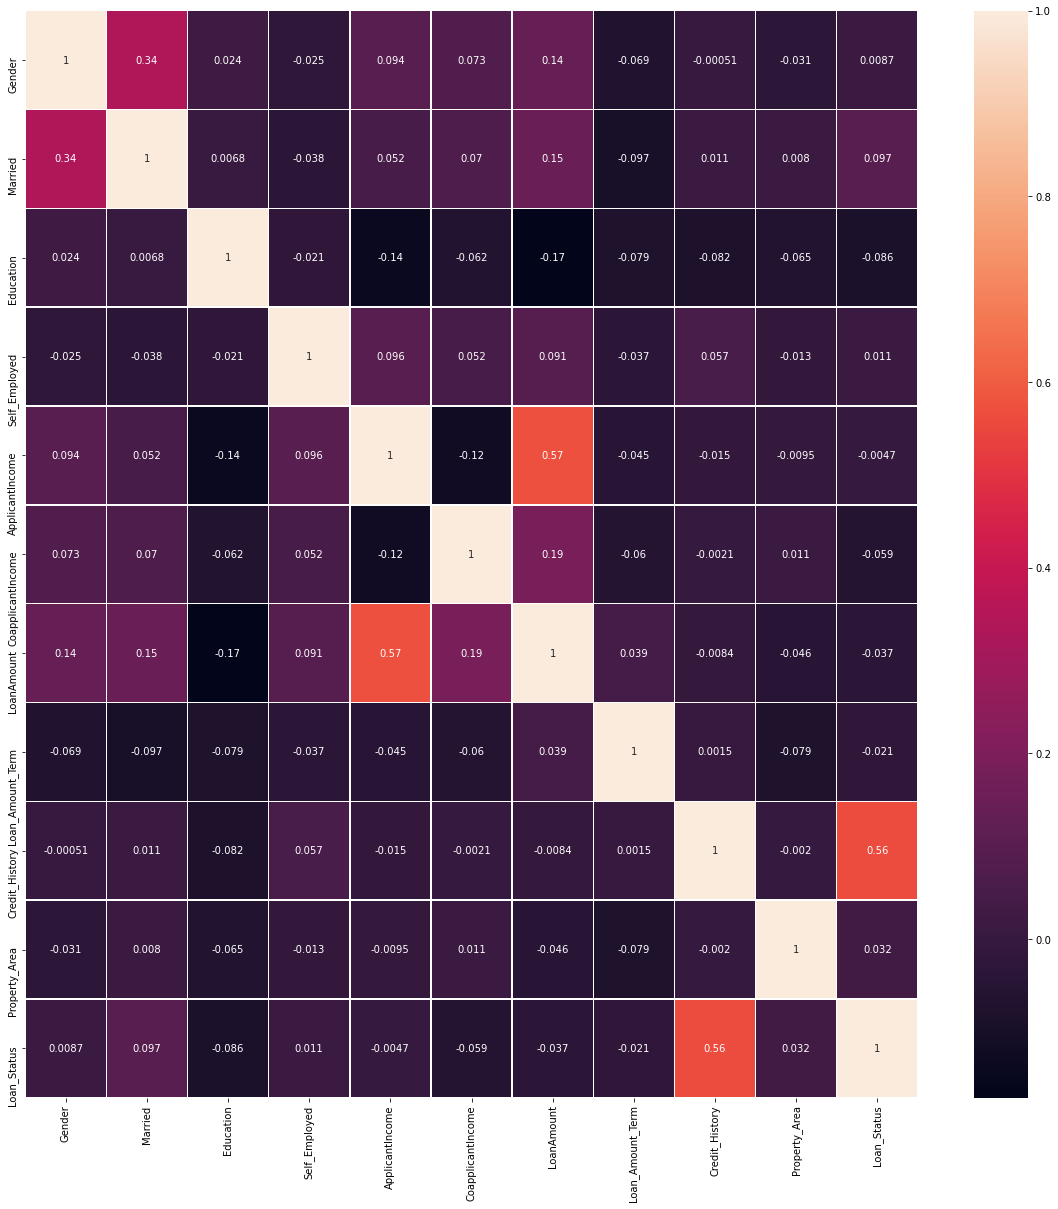

In [97]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True, linewidth=0.5,)

# EDA Concluding Remarks:
1. replaced all object to float.
2. replaced NaN 
2. No major correlation between the data given.
3. removed outliers and reduce the skewness.

# Pre-processing Pipeline

In [101]:
x=df_1.drop(columns='Loan_Status')
y=df_1['Loan_Status']

In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.41009471, -1.35393448, -0.57735027, ..., -0.37851408,
         0.25669516,  0.44885381],
       [ 0.41009471,  0.71446688, -0.57735027, ...,  0.0061169 ,
         0.25669516,  0.44885381],
       [ 0.41009471,  0.71446688, -0.57735027, ..., -1.24899472,
         0.25669516,  0.44885381],
       ...,
       [ 0.41009471,  0.71446688, -0.57735027, ...,  2.53658389,
         0.25669516,  0.44885381],
       [ 0.41009471,  0.71446688, -0.57735027, ...,  1.20049732,
         0.25669516,  0.44885381],
       [-2.00439548, -1.35393448, -0.57735027, ...,  0.10733558,
         0.25669516, -2.36229438]])

In [103]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [104]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,1.196849,Gender
1,1.359807,Married
2,1.062115,Education
3,1.013315,Self_Employed
4,1.661512,ApplicantIncome
5,1.597717,CoapplicantIncome
6,1.034119,Property_Area
7,1.213281,Dependent
8,1.841599,Loan_amount
9,1.065612,Loan_amount_Term


# Building Machine Learning Model

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [107]:
y_predict_test = classifier.predict(x_test)

In [108]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[21, 18],
       [ 2, 90]], dtype=int64)

In [109]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.83      0.98      0.90        92

    accuracy                           0.85       131
   macro avg       0.87      0.76      0.79       131
weighted avg       0.86      0.85      0.83       131



In [111]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val=cross_val_score(classifier, x,y,cv=7)
cross_val.mean()

0.8187644787644788

In [113]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_search2 = GridSearchCV(classifier, param_grid=param)

In [114]:
grid_result = grid_search2.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 0.1}


In [115]:
regress=LogisticRegression(C=0.01)
regress.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [116]:
y_predict_t = regress.predict(x_test)

In [117]:
accuracy_score(y_test, y_predict_t)

0.8549618320610687

In [118]:
print(classification_report(y_test, y_predict_t))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69        39
           1       0.83      0.99      0.91        92

    accuracy                           0.85       131
   macro avg       0.89      0.76      0.80       131
weighted avg       0.87      0.85      0.84       131



logistic Regression:85%

# Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
y_pr=clf.predict(x_test)

In [122]:
accuracy_score(y_test, y_pr)

0.8549618320610687

In [123]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.92      0.56      0.70        39
           1       0.84      0.98      0.90        92

    accuracy                           0.85       131
   macro avg       0.88      0.77      0.80       131
weighted avg       0.86      0.85      0.84       131



In [124]:
cm_ = confusion_matrix(y_test, y_pr)
cm_

array([[22, 17],
       [ 2, 90]], dtype=int64)

In [125]:
cross_val=cross_val_score(clf, x,y,cv=7)
cross_val.mean()

0.793951093951094

In [126]:
param_grid_1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_1 = GridSearchCV(estimator = clf, param_grid = param_grid_1)

In [127]:
grid_result_1 = grid_search_1.fit(x_train, y_train)
print('Best Params: ', grid_result_1.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 5}


In [128]:
print('Best Score: ', grid_result_1.best_score_)

Best Score:  0.8089581304771178


In [129]:
rf=RandomForestClassifier(bootstrap= True, max_depth= 100, max_features= 2, min_samples_leaf= 5)

In [130]:
rf.fit(x_train, y_train)
y_pr1=rf.predict(x_test)

In [131]:
accuracy_score(y_test, y_pr1)

0.8549618320610687

In [132]:
print(classification_report(y_test, y_pr1))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69        39
           1       0.83      0.99      0.91        92

    accuracy                           0.85       131
   macro avg       0.89      0.76      0.80       131
weighted avg       0.87      0.85      0.84       131



Random forest=85%

# KNN algorithm

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
knn=KNeighborsClassifier()

In [135]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [136]:
y_predict=knn.predict(x_test)

In [137]:
accuracy_score(y_test, y_predict)

0.8473282442748091

In [140]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[21, 18],
       [ 2, 90]], dtype=int64)

In [141]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.83      0.98      0.90        92

    accuracy                           0.85       131
   macro avg       0.87      0.76      0.79       131
weighted avg       0.86      0.85      0.83       131



In [142]:
cross_val=cross_val_score(knn,x,y,cv=7)
cross_val.mean()

0.6297297297297298

In [143]:
param_grid ={'algorithm':['kd_tree','brute'] , 'leaf_size':[10,11,14,18,20,25,30]}

In [144]:
grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 14, 18, 20, 25, 30]})

In [145]:
grid_result = grid_search.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'algorithm': 'kd_tree', 'leaf_size': 10}


In [146]:
kn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=10)

In [147]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10)

In [148]:
y_predict1=kn.predict(x_test)

In [149]:
accuracy_score(y_test, y_predict1)

0.8473282442748091

In [150]:
cfm=confusion_matrix(y_test,y_predict1)
cfm

array([[21, 18],
       [ 2, 90]], dtype=int64)

In [151]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.83      0.98      0.90        92

    accuracy                           0.85       131
   macro avg       0.87      0.76      0.79       131
weighted avg       0.86      0.85      0.83       131



In [152]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.7808503732554366


knn score=85%

In [154]:
a=np.array(y_test)
lr=np.array(classifier.predict(x_test))
rf=np.array(clf.predict(x_test))
k=np.array(kn.predict(x_test))
df_loan=pd.DataFrame({'original':a,'Predicted_lr':lr,'pred_rf':rf,'pred_knn':k})
df_loan.head(10)

,original,Predicted_lr,pred_rf,pred_knn
0,0,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,0,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


In [156]:
df_loan.tail(10)

,original,Predicted_lr,pred_rf,pred_knn
121,1,1,1,1
122,0,0,0,0
123,1,1,1,1
124,1,1,1,1
125,0,0,0,0
126,0,0,0,0
127,0,1,1,1
128,1,1,1,1
129,1,1,1,1
130,0,0,0,0


<AxesSubplot:>

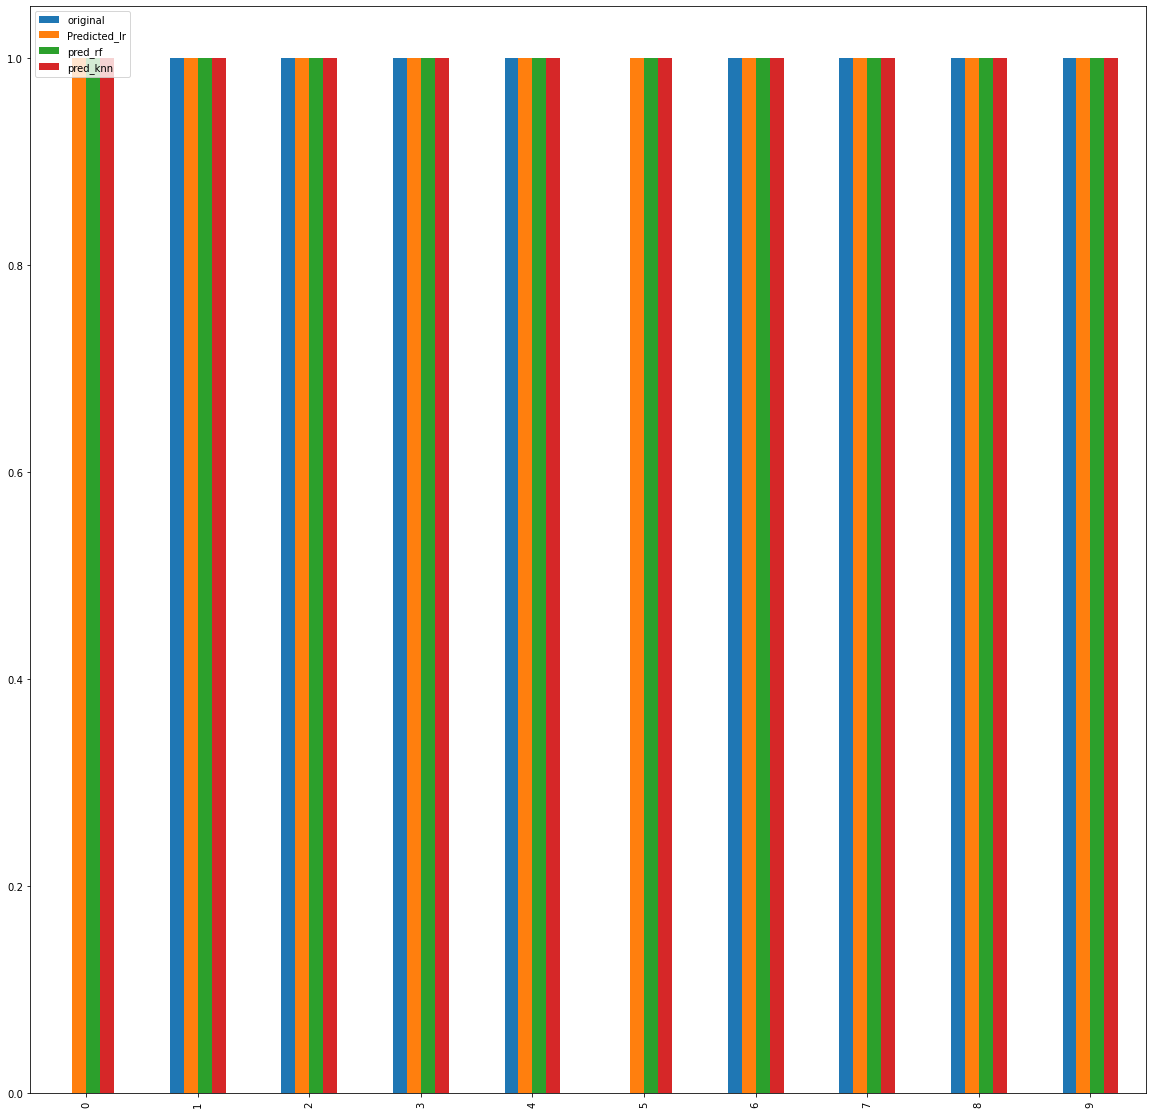

In [157]:
df_loan.head(10).plot.bar(figsize=(20,20))

# Concluding Remark
Taking Logistic Regression is the best model as it has highest accuracy and best cross validation

# Saving Model

In [158]:
import pickle
filename='Loan Applicaton Status.pickle'
pickle.dump(regress,open(filename,'wb'))